### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

### Import Datasets

In [2]:
# features
x_train = pd.read_csv('training_set.csv')
x_test = pd.read_csv('testing_set.csv')

# labels
y_train = pd.read_csv('training_labels.csv')
y_test = pd.read_csv('testing_labels.csv')

print(x_train.columns)
print(x_test.columns)
print(y_train.columns)
print(y_test.columns)

Index(['district', 'street', 'propertyType', 'remaining_lease', 'school',
       'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number',
       'latitude', 'longitude', 'floor_area_sqm', 'floor_range', 'sentiment'],
      dtype='object')
Index(['district', 'street', 'propertyType', 'remaining_lease', 'school',
       'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number',
       'latitude', 'longitude', 'floor_area_sqm', 'floor_range', 'sentiment'],
      dtype='object')
Index(['price'], dtype='object')
Index(['price'], dtype='object')


In [3]:
x_train.head(2)

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,3,1664,6,78.75,24,16,7,0,193.285714,1.295995,103.803682,110.0,5,0.123678
1,18,1374,4,71.92,26,4,14,0,163.857143,1.373332,103.956317,122.0,1,0.077219


### Summary of Results
*Goal: Low RMSE, Low MAE, R2 close to 1, High Adjusted R2*, Low MAPE, Low SMAPE
    
Conclusions:
1. Random Forest better performance
2. For random forest, using Grid Search helped us in finding better estimators to improve the model slightly
3. For decision tree, using Grid Search did not help us to find better estimators (dk why? and the adjusted r2 for the model w grid search is negaative? huh? confused)

### Define function for MAPE and sMAPE

In [4]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def adjusted_r2(r2, n, p):
    result = 1-((1-r2)*((n-1)/(n-p-1)))
    return result

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)

### Decision Tree

#### (a) Basic Decision Tree with Default Parameters

[525800. 717200. 400000. ... 285000. 237000. 415000.]
training mse: 576926634.9985657, testing mse: 182289559347.27423
training rmse: 24019.297137896556, testing rmse: 426953.81406807253
training mae: 3730.394368578732, testing mae: 77941.05185641066
training R2: 0.999787644783206, testing R2: 0.9151981426841171
training adjusted R2: 0.999787643018271, testing adjusted R2: 0.9151917985637225
training mape: 0.4807289647660674, testing mape: 6.364360910778973
training smape: 0.4787405746558657, testing smape: 6.253174881579065


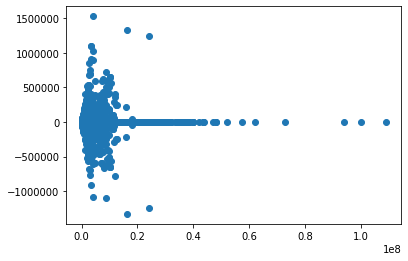

In [5]:
# train model
dt = tree.DecisionTreeRegressor()
dt.fit(x_train,y_train)

# make predictions on test set
y_pred_train = dt.predict(x_train)
y_pred = dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# original_train_adj_r_squared = 1 - (1-r2_score(y_train,y_pred_train))*(len(y_pred_train)-1)/(len(y_pred_train)-y_train.shape[1]-1)
# original_test_adj_r_squared = 1 - (1-r2_score(y_test,y_pred))*(len(y_pred)-1)/(len(y_pred)-y_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)
# X=training label
# y=predicted i.e. y_pred_train
# 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis) 

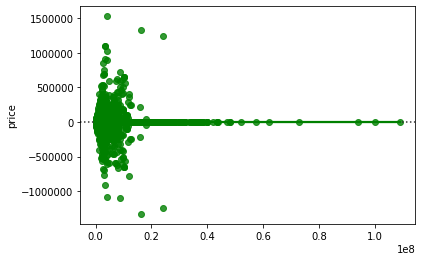

In [6]:
# vicki's residual plot: sns.residplot(y_pred_train.reshape(-1), y_train, lowess= True, color="g")
sns.residplot(x_axis, y_axis, lowess=True, color="g")

In [7]:
dt.get_params(deep=True)

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

#### (b) Decision Tree using Best Estimators from Grid Search
- did 2 tests to kinda see which one better

In [8]:
# test 1: best parameter is 'max_leaf_nodes': [200,400,600,800], 'min_samples_split': [7,12,15,20]

In [9]:
params = {'max_features': [1,2,3,4,5], 'min_samples_split': [7,12,15,20,25]}
gsearch_dt = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), 
                          params, 
                          scoring = 'r2',
                          verbose=1, 
                          cv=3, 
                          n_jobs=-1)
gsearch_dt.fit(x_train, y_train)
print('best score:', gsearch_dt.best_score_)
print('best parameters: ', gsearch_dt.best_params_)
print('best estimators: ', gsearch_dt.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    8.9s finished


best score: 0.8848076321043811
best parameters:  {'max_features': 5, 'min_samples_split': 15}
best estimators:  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=5,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')


[580000.         669740.66666667 394285.71428571 ... 275636.36363636
 245000.         369683.69230769]
training mse: 111459740548.75154, testing mse: 150395190674.12054
training rmse: 333855.8679261929, testing rmse: 387808.1879926216
training mae: 64336.10415905163, testing mae: 90505.83470321858
training R2: 0.9589738869170285, testing R2: 0.9300355349685996
training adjusted R2: 0.9589735459391855, testing adjusted R2: 0.930030300849872
training mape: 4.621055130865226, testing mape: 6.384209075510773
training smape: 4.552921991034974, testing smape: 6.2550513574962245


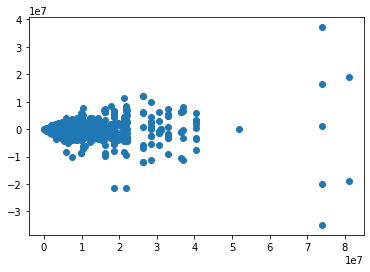

In [10]:
# make predictions on test set
y_pred_train = gsearch_dt.predict(x_train)
y_pred = gsearch_dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# train_adj_r_squared = 1 - (1-gsearch_dt.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
# test_adj_r_squared = 1 - (1-gsearch_dt.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [11]:
# test 2: best parameter is 'min_samples_split': [7,12,15,20,25]

In [12]:
params = {'min_samples_split': [7,12,15,20,25]}
gsearch_dt = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), 
                          params, 
                          scoring = 'r2',
                          verbose=1, 
                          cv=3, 
                          n_jobs=-1)
gsearch_dt.fit(x_train, y_train)
print('best score:', gsearch_dt.best_score_)
print('best parameters: ', gsearch_dt.best_params_)
print('best estimators: ', gsearch_dt.best_estimator_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.5s finished


best score: 0.8843238543949316
best parameters:  {'min_samples_split': 25}
best estimators:  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=25, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')


[522440.         707111.11111111 386250.         ... 278863.63636364
 261309.89473684 388111.        ]
training mse: 103237466407.11078, testing mse: 155023130145.71698
training rmse: 321305.8767080222, testing rmse: 393729.7679192126
training mae: 63510.774434985295, testing mae: 88434.93175152308
training R2: 0.9620003424522143, testing R2: 0.9278825983761686
training adjusted R2: 0.9620000266279676, testing adjusted R2: 0.9278772031938821
training mape: 4.64983042955152, testing mape: 6.2053590719897445
training smape: 4.592870813856349, testing smape: 6.080733301088615


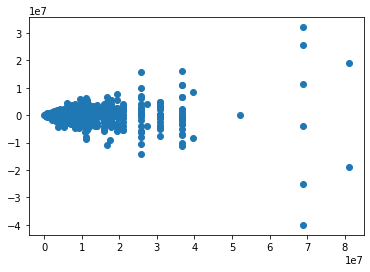

In [13]:
# make predictions on test set
y_pred_train = gsearch_dt.predict(x_train)
y_pred = gsearch_dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# train_adj_r_squared = 1 - (1-gsearch_dt.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
# test_adj_r_squared = 1 - (1-gsearch_dt.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis) 

### Random Forest

#### (a) Basic Random Forest with Default Parameters

/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[541500.  725488.8 395200.  ... 282000.  255800.  416500. ]
training mse: 29961751986.119373, testing mse: 86766785365.89618
training rmse: 173094.63303672755, testing rmse: 294562.0229525459
training mae: 29799.325329231066, testing mae: 69866.83242496033
training R2: 0.9889716751618596, testing R2: 0.95963573241
training adjusted R2: 0.9889715835028129, testing adjusted R2: 0.9596327127146614
training mape: 2.333325331147571, testing mape: 5.496226355953414
training smape: 2.3013791657528193, testing smape: 5.353428214813264


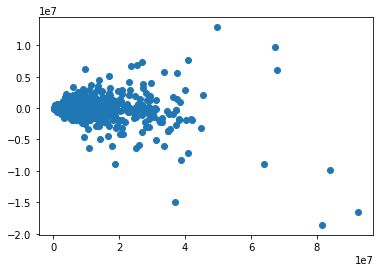

In [14]:
# train model
rforest = ensemble.RandomForestRegressor()
rforest.fit(x_train,y_train)

# make predictions on test set
y_pred_train = rforest.predict(x_train)
y_pred = rforest.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# train_adj_r_squared = 1 - (1-rforest.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
# test_adj_r_squared = 1 - (1-rforest.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis)  

In [15]:
rforest.get_params(deep=True)

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### (b) Random Forest using Best Estimators from Grid Search
- did 2 tests to kinda see which one better

In [16]:
# test 1: best parameter is 150

In [17]:
params = {'n_estimators': [10,50,100,150]}
grid_search_cv = GridSearchCV(ensemble.RandomForestRegressor(random_state=42), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1)
grid_search_cv.fit(x_train, y_train)
print('best score:', grid_search_cv.best_score_)
print('best parameters: ', grid_search_cv.best_params_)
print('best estimators: ', grid_search_cv.best_estimator_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.9min finished
/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best score: 0.9233411859502815
best parameters:  {'n_estimators': 100}
best estimators:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


[537946.76       722812.32       393763.33333333 ... 283030.
 251254.83333333 410475.        ]
training mse: 25082927165.464275, testing mse: 77256677391.8895
training rmse: 158375.90462398084, testing rmse: 277950.85427443736
training mae: 27007.811368283885, testing mae: 65915.7266485403
training R2: 0.9907674735175597, testing R2: 0.964059873991987
training adjusted R2: 0.9907673967838229, testing adjusted R2: 0.9640571852715555
training mape: 2.1596243092589127, testing mape: 5.271408744684814
training smape: 2.1306012908875682, testing smape: 5.138643336486796


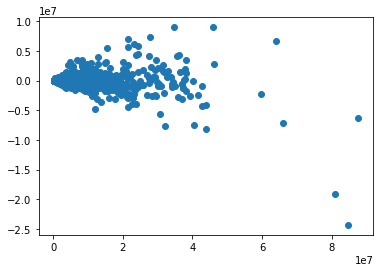

In [18]:
# make predictions on test set
y_pred_train = grid_search_cv.predict(x_train)
y_pred = grid_search_cv.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# train_adj_r_squared = 1 - (1-grid_search_cv.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
# test_adj_r_squared = 1 - (1-grid_search_cv.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [19]:
# test 2: best parameter is 150

In [20]:
params = {'n_estimators': [100,150,200,250]}
grid_search_cv = GridSearchCV(ensemble.RandomForestRegressor(random_state=42), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1)
grid_search_cv.fit(x_train, y_train)
print('best score:', grid_search_cv.best_score_)
print('best parameters: ', grid_search_cv.best_params_)
print('best estimators: ', grid_search_cv.best_estimator_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.6min finished
/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best score: 0.9233411859502815
best parameters:  {'n_estimators': 100}
best estimators:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


[537946.76       722812.32       393763.33333333 ... 283030.
 251254.83333333 410475.        ]
training mse: 25082927165.464275, testing mse: 77256677391.8895
training rmse: 158375.90462398084, testing rmse: 277950.85427443736
training mae: 27007.811368283885, testing mae: 65915.7266485403
training R2: 0.9907674735175597, testing R2: 0.964059873991987
training adjusted R2: 0.9907673967838229, testing adjusted R2: 0.9640571852715555
training smape: 2.1306012908875682, testing smape: 5.138643336486796


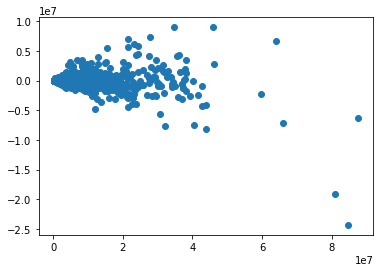

In [21]:
# make predictions on test set
y_pred_train = grid_search_cv.predict(x_train)
y_pred = grid_search_cv.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# train_adj_r_squared = 1 - (1-grid_search_cv.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
# test_adj_r_squared = 1 - (1-grid_search_cv.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [22]:
params = {'n_estimators': [10]}
grid_search_cv = GridSearchCV(ensemble.RandomForestRegressor(random_state=42), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1)
grid_search_cv.fit(x_train, y_train)
print('best score:', grid_search_cv.best_score_)
print('best parameters: ', grid_search_cv.best_params_)
print('best estimators: ', grid_search_cv.best_estimator_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.2s finished
/Users/tohjiaxuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best score: 0.9182204952068366
best parameters:  {'n_estimators': 10}
best estimators:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


[552000.  725177.6 395450.  ... 283500.  254800.  409000. ]
training mse: 41259516393.954895, testing mse: 80926631711.95708
training rmse: 203124.38650727022, testing rmse: 284476.0652708011
training mae: 30095.87021744233, testing mae: 68749.48269844061
training R2: 0.9848131928443999, testing R2: 0.9623525960561548
training adjusted R2: 0.9848130666232117, testing adjusted R2: 0.9623497796123794
training smape: 2.310368088585477, testing smape: 5.3482007620886725


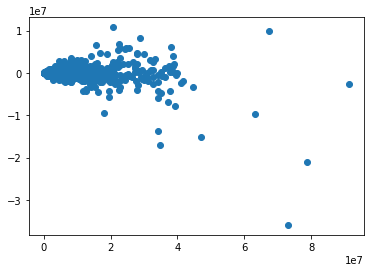

In [23]:
# make predictions on test set
y_pred_train = grid_search_cv.predict(x_train)
y_pred = grid_search_cv.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# train_adj_r_squared = 1 - (1-grid_search_cv.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
# test_adj_r_squared = 1 - (1-grid_search_cv.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [24]:
rforest.get_params(deep=True)

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}